# TEWA TUTORIAL - Logistic regression
May-2022

@ Jozsef Arato

1. sigmoid curve,
How to make predictions with a logistic regression model- and visualize prediciton  
2.  understand the intercept and slope in their effect on the sigmoid
3. simulating binary data, based on the predicted sigmoid probabilities
4. fitting a logistic regression model to the simulated data
5. check similarity of parameters of fitted model, to the parameters that were used to "make" the data
6. understanding logistic regression likelihood and  score 

import libraries

In [1]:
import numpy as np
from matplotlib import pyplot as plt

## Simulating data with a logistic regression model

Scenario: time spent studying predicting success on a pass or fail exam: 
p(Success)  🕔 🧑

### sigmoid
first step for this simulation is to implement the sigmoid function:
the function should take as input x and return:

1/(1+e<sup>-x</sup>)




In [2]:
def sigmoid_fun(x):
    return 1 / (1 + np.exp(-x))

Test this function with the X= numbers -5 to 5 
and plot the result

Text(0, 0.5, 'Sigmoid(X')

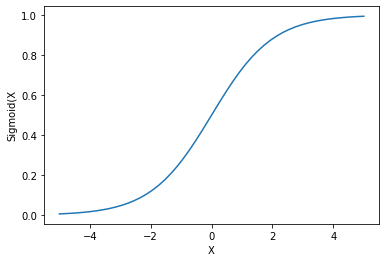

In [3]:
X=np.linspace(-5, 5, 50)
plt.plot(X,sigmoid_fun(X))
plt.xlabel('X')
plt.ylabel('Sigmoid(X')

to implement the exam scenario, we examine a scenario, where the students  study something between 0 to 50 hours for the exam

however, lets make data that is centered at zero, that is students study -25 to +25 hours relative to the average

In [4]:
N = 100
X = np.linspace(-25, 25, N)
print(X)

[-25.         -24.49494949 -23.98989899 -23.48484848 -22.97979798
 -22.47474747 -21.96969697 -21.46464646 -20.95959596 -20.45454545
 -19.94949495 -19.44444444 -18.93939394 -18.43434343 -17.92929293
 -17.42424242 -16.91919192 -16.41414141 -15.90909091 -15.4040404
 -14.8989899  -14.39393939 -13.88888889 -13.38383838 -12.87878788
 -12.37373737 -11.86868687 -11.36363636 -10.85858586 -10.35353535
  -9.84848485  -9.34343434  -8.83838384  -8.33333333  -7.82828283
  -7.32323232  -6.81818182  -6.31313131  -5.80808081  -5.3030303
  -4.7979798   -4.29292929  -3.78787879  -3.28282828  -2.77777778
  -2.27272727  -1.76767677  -1.26262626  -0.75757576  -0.25252525
   0.25252525   0.75757576   1.26262626   1.76767677   2.27272727
   2.77777778   3.28282828   3.78787879   4.29292929   4.7979798
   5.3030303    5.80808081   6.31313131   6.81818182   7.32323232
   7.82828283   8.33333333   8.83838384   9.34343434   9.84848485
  10.35353535  10.85858586  11.36363636  11.86868687  12.37373737
  12.87878788

next step is too see, what the sigmoid predicts for these hours of studying

Text(0, 0.5, 'P(Success)')

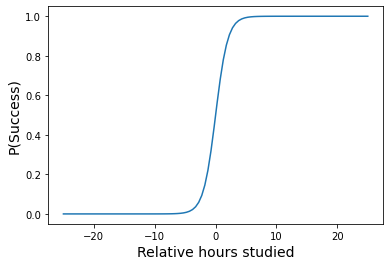

In [5]:
plt.plot(X, sigmoid_fun(X))

plt.xlabel('Relative hours studied',fontsize=14)
plt.ylabel('P(Success)',fontsize=14)


clearly the above is not sufficient

we did not yet implement the logistic regression model:

### linear equation inside sigmoid


p(Y)=sigmoid(b<sub>0</sub>+b<sub>1</sub>*X)

define two parameters for the intercept and the slope,
and use them with mysigmoid, to test how it changes the model predictions

visualize the result as above


(0.0, 1.0)

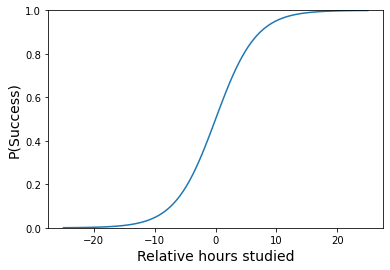

In [6]:
# sigmoid prediction for a single combination
b_0 = 0
b_1 = 0.3
lin_pred =  b_0 + b_1 * X
p_Y=sigmoid_fun(lin_pred)
plt.plot(X, p_Y)
plt.xlabel('Relative hours studied',fontsize=14)
plt.ylabel('P(Success)',fontsize=14)
plt.ylim([0,1])

Check "divide by 4 rule" and compare to difference of 1 prediction 
(slope/4 roughly = change in Y for unit change in X

In [7]:
0.3 / 4

0.075

In [8]:
sigmoid_fun(b_1 * -.5) - sigmoid_fun(b_1 * .5)

-0.07485969068749915

##  testing prediction of different intercepts 
(plotted on the same figure)

use a for cycle

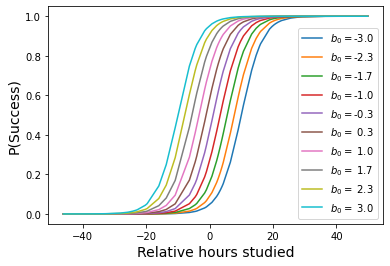

In [130]:
# test for multiple values of b0 and b1

b_0_space = np.linspace(-3,3,10)
b_1 = 0.3

for b_0 in b_0_space:
    plt.plot(X, sigmoid_fun(b_0 + b_1 * X), label = f"$b_0 = ${b_0: .1f}")

plt.legend(loc = "lower right")
plt.xlabel('Relative hours studied',fontsize=14)
plt.ylabel('P(Success)',fontsize=14);

##  testing prediciton of  different slopes 
(plotted on the same figure)

use a for cycle

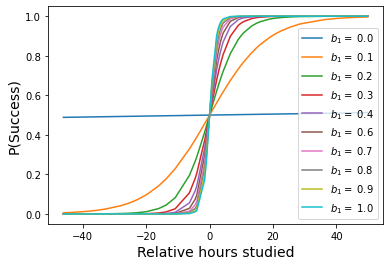

In [131]:
b_1_space = np.linspace(.001,1,10)
b_0 = 0

for b_1 in b_1_space:
    plt.plot(X, sigmoid_fun(b_0 + b_1 * X), label = f"$b_1 = ${b_1: .1f}")

plt.legend(loc = "lower right")
plt.xlabel('Relative hours studied',fontsize=14)
plt.ylabel('P(Success)',fontsize=14);

try to find good values for b<sub>0</sub> and b<sub>1</sub> for an exam, where almost everyone who studies less than 10 hours fails, but almost everyone who studies more then 20 hours succeeds




95% will fail


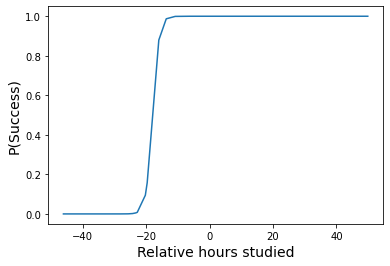

In [126]:
# 25 = 0
# 10 = -15
centered_h = -15 # -15 is 10h

b_0 = 18
b_1 = 1
lin_pred = b_0 + b_1 * X
p_Y = sigmoid_fun(lin_pred)
plt.plot(X,p_Y)
plt.xlabel('Relative hours studied',fontsize=14)
plt.ylabel('P(Success)',fontsize = 14)
print(f"{sigmoid_fun(b_0 + b_1 * centered_h):.0%} will fail")

find values for b0 and b1, for an exam, where there is a smooth transition, and people who study more are more likely to succeed, but almost everyone passes, who studied more than 80 hours (approximately)

95% will pass


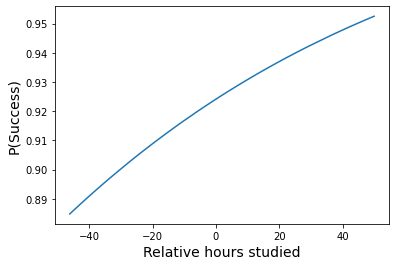

In [125]:
centered_h = 80 - 25 # -15 is 10h

b_0 = 2.5
b_1 = 0.01
lin_pred = b_0 + b_1 * X
p_Y = sigmoid_fun(lin_pred)
plt.plot(X,p_Y)
plt.xlabel('Relative hours studied',fontsize=14)
plt.ylabel('P(Success)',fontsize = 14)
print(f"{sigmoid_fun(b_0 + b_1 * centered_h):.0%} will pass")

now that we set up the model, we are almost ready to simulate some data

for this we need the numpy random.binomial generator

test this function, and try to understand what it is doing  

the goal here is to use probabilities, to simulate random binary outcomes



## Now we are ready to start the simulation
### simulate X
I. simulate 50 students, who uniformly studies someting between 0 and 100 hours ( np.random.uniform).  (visualize-histogram)

or between -50 and 50!


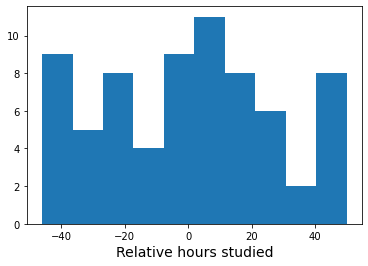

In [123]:
N = 70
X = np.random.uniform(-50, 50, N)
X = np.sort(X)

plt.hist(X)
plt.xlabel('Relative hours studied',fontsize=14);

### calculate p(succes)
II. make predictions for the probability of passing the exam for each student using the linear equation and the sigmoid function

 visualize the prediction.  use np.sort or scatter, as a simple line plot will be messy

[0.01407196 0.01890732 0.02305951 0.02475523 0.02852038 0.02900564
 0.0291813  0.03218484 0.03340473 0.03351562 0.03475706 0.0429262
 0.04589758 0.04603834 0.04652239 0.05014686 0.07487064 0.08245307
 0.08881613 0.09307442 0.11311275 0.1232748  0.15777352 0.16242656
 0.18411794 0.23435089 0.28150467 0.28903218 0.29027223 0.34769629
 0.44571251 0.47583491 0.53073957 0.60610323 0.73347647 0.77207929
 0.79317439 0.82510239 0.83856382 0.88720939 0.90070125 0.90627147
 0.90641574 0.92233684 0.92331009 0.93163106 0.93560021 0.93772931
 0.94368348 0.95678717 0.95823198 0.96226235 0.96683254 0.96918577
 0.98417076 0.98444402 0.98513273 0.99004134 0.99008809 0.99076144
 0.99292163 0.99345418 0.99677061 0.99782656 0.99803263 0.99810743
 0.99834372 0.99863306 0.99889157 0.99922994]


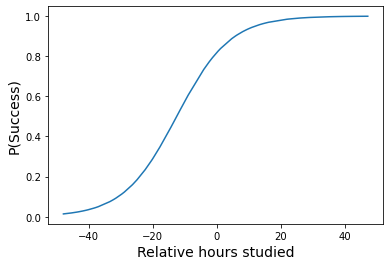

In [14]:
b_0_gen = 1.5
b_1_gen = .12
y_pred = sigmoid_fun(b_0_gen + b_1_gen * X)
plt.plot(X, y_pred)
plt.xlabel('Relative hours studied',fontsize = 14)
plt.ylabel('P(Success)',fontsize = 14)

print(y_pred)

### simulate Y
Now we can use the predicted probabilties from above, so simulate, whether the student passed the exam or not, using the np.random.binomial

1. make Y equal to the simulated success (=1) or fail (=0), and make a single random prediciton based on each value in Ypred


2. visualize the result with a scatter plot, and also with the predicted curve

In [15]:
y_pred

array([0.01407196, 0.01890732, 0.02305951, 0.02475523, 0.02852038,
       0.02900564, 0.0291813 , 0.03218484, 0.03340473, 0.03351562,
       0.03475706, 0.0429262 , 0.04589758, 0.04603834, 0.04652239,
       0.05014686, 0.07487064, 0.08245307, 0.08881613, 0.09307442,
       0.11311275, 0.1232748 , 0.15777352, 0.16242656, 0.18411794,
       0.23435089, 0.28150467, 0.28903218, 0.29027223, 0.34769629,
       0.44571251, 0.47583491, 0.53073957, 0.60610323, 0.73347647,
       0.77207929, 0.79317439, 0.82510239, 0.83856382, 0.88720939,
       0.90070125, 0.90627147, 0.90641574, 0.92233684, 0.92331009,
       0.93163106, 0.93560021, 0.93772931, 0.94368348, 0.95678717,
       0.95823198, 0.96226235, 0.96683254, 0.96918577, 0.98417076,
       0.98444402, 0.98513273, 0.99004134, 0.99008809, 0.99076144,
       0.99292163, 0.99345418, 0.99677061, 0.99782656, 0.99803263,
       0.99810743, 0.99834372, 0.99863306, 0.99889157, 0.99922994])

Text(0, 0.5, 'Exame outcome')

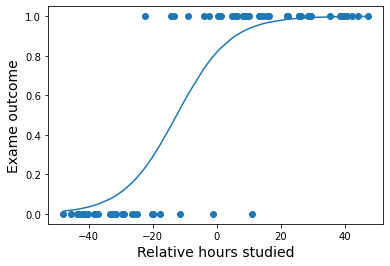

In [16]:
y = [np.random.binomial(1, p) for p in y_pred]

plt.scatter(X, y)
plt.plot(X, y_pred)

plt.xlabel('Relative hours studied',fontsize=14)
plt.ylabel('Exame outcome',fontsize=14)


now we are ready with a data-set simulated with a logistic model! ✌

next step is to actually fit a logistic regression to this data! 👼
## Fitting logistic regression

In [17]:
from sklearn.linear_model import LogisticRegression

try to fit the logistic regression model to the X,Y data, that we created above

for X we will need .reshape(-1, 1)  for dimensionality issues

In [18]:
reg = LogisticRegression()
reg.fit(X.reshape(-1, 1), y)

LogisticRegression()

print the fitted parameters
intercept_ and slope:  coef_



In [19]:
print(f"generating slope = {b_1_gen}")
print(f"fitted slope = {reg.coef_[0]}")
print(f"generating intercept = {b_0_gen}")
print(f"fitted intercept = {reg.intercept_[0]}")

generating slope = 0.12
fitted slope = [0.15350088]
generating intercept = 1.5
fitted intercept = 1.6957438068385542


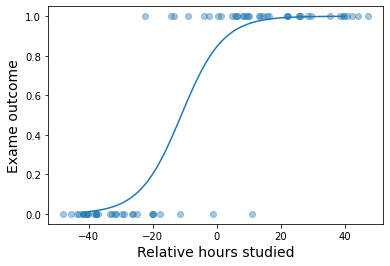

In [122]:
X_linspace = np.sort(np.linspace(-40, 40, 100))

plt.scatter(X, y, alpha = 0.4)
plt.plot(X_linspace, sigmoid_fun(reg.intercept_[0] + reg.coef_[0][0] * X_linspace))
plt.xlabel('Relative hours studied',fontsize=14)
plt.ylabel('Exame outcome',fontsize=14);

try to visualize the fitted model, together with the data

## Compare data generating and fitted model
compare the generating model from the simulation, and the fitted model, that we got with scikit-learn
compare both the numbers and visulize the curves

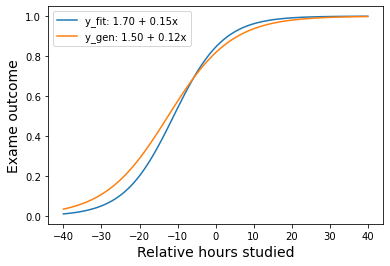

In [62]:
y_fit = (sigmoid_fun(reg.intercept_ + reg.coef_ * X_linspace)).ravel()
y_gen = (sigmoid_fun(b_0_gen + b_1_gen * X_linspace)).ravel()

plt.figure()
plt.plot(X_linspace, y_fit, label = f"y_fit: {reg.intercept_[0]:.2f} + {reg.coef_.ravel()[0]:.2f}x")
plt.plot(X_linspace, y_gen, label = f"y_gen: {b_0_gen:.2f} + {b_1_gen:.2f}x")

plt.xlabel('Relative hours studied',fontsize=14)
plt.ylabel('Exame outcome',fontsize=14)
plt.legend();

## Likelihood
check the likelihood of the data, with visualization of scatter plots

(color of the scatter plot should be proportional to the likelihood).


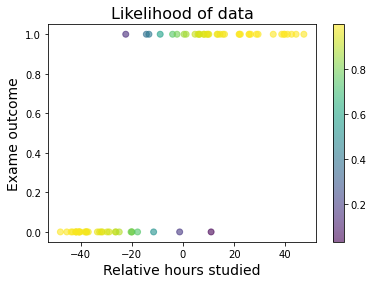

In [121]:
y_lh = y * (y_pred) + (np.ones(len(y)) - y) * (np.ones(len(y_pred)) - y_pred)

plt.scatter(X, y, c =y_lh, alpha = 0.6)
plt.colorbar()
plt.xlabel('Relative hours studied',fontsize=14)
plt.ylabel('Exame outcome',fontsize=14)
plt.title("Likelihood of data", fontsize=16);

## homework
use the relevant parts of the code above, to make 2 functions: one for generating binary outcome data based on the logistic model and one for fitting the logistic regression with scikit learn

### Function 1.: MakeLogisticDat

Three inputs, 1: intercept, 2: slope, 3: array X, that is used to make the predictions.

the function should take the 3rd input X, and use the intercept and the slope, to calculate P(Y) for each value of X. P(Y) means: predicted probabilities outcome=1 (as above).

Next the function shuold simulate a binary outcomes for array Y, for each p(Y) (as above).

One output: numpy.array Y (same length as input X), that contains the simulated binary outcomes 


### Function 2.: FitLogistic
Inputs (2): an X and a Y array
fit the scikit learn logistic regression (pay attention that you have to reshape X, so that it is a 2d array).
Output (2): intercept and slope of fitted logistic regression

!! pay attention to the order of the inputs and the outputs (should be the same order - and same number as above)
!! the function names should also be exactly as defined above!


### -- explore

once you have these functions ready, 
try to change the number of participants and generate a different Xdataset for each, and see how it affects the difference between the data generating and the fitted model

you do not need to submit this part, only the two functions
 

In [ ]:
# your code
# your code


> Indented block



In [ ]:
# your code
# your code
# your code
# your code